In [2]:
# Import necessary Libraries to be used
from urllib.request import urlopen
from numpy import loadtxt
from numpy import unique
from pandas import read_csv

# Define the location of the dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/oil-spill.csv'

# Load the dataset into a dataframe df
df = read_csv(path, header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1,2558,1506.09,456.63,90,6395000.0,40.88,7.89,29780.0,0.19,...,2850.00,1000.00,763.16,135.46,3.73,0,33243.19,65.74,7.95,1
1,2,22325,79.11,841.03,180,55812500.0,51.11,1.21,61900.0,0.02,...,5750.00,11500.00,9593.48,1648.80,0.60,0,51572.04,65.73,6.26,0
2,3,115,1449.85,608.43,88,287500.0,40.42,7.34,3340.0,0.18,...,1400.00,250.00,150.00,45.13,9.33,1,31692.84,65.81,7.84,1
3,4,1201,1562.53,295.65,66,3002500.0,42.40,7.97,18030.0,0.19,...,6041.52,761.58,453.21,144.97,13.33,1,37696.21,65.67,8.07,1
4,5,312,950.27,440.86,37,780000.0,41.43,7.03,3350.0,0.17,...,1320.04,710.63,512.54,109.16,2.58,0,29038.17,65.66,7.35,0


In [2]:
# summarize the number of unique values in each column
print(df.nunique())

0     238
1     297
2     927
3     933
4     179
5     375
6     820
7     618
8     561
9      57
10    577
11     59
12     73
13    107
14     53
15     91
16    893
17    810
18    170
19     53
20     68
21      9
22      1
23     92
24      9
25      8
26      9
27    308
28    447
29    392
30    107
31     42
32      4
33     45
34    141
35    110
36      3
37    758
38      9
39      9
40    388
41    220
42    644
43    649
44    499
45      2
46    937
47    169
48    286
49      2
dtype: int64


In [3]:
# Columns that have a single observation or value are probably useless for modeling.
# These columns or predictors are referred to zero-variance predictors 
# Delete columns with a single unique value

print("Oil Spill Data Set before deleting columns: ", df.shape)
# get number of unique values for each column
counts = df.nunique()

# record columns to delete
to_del = [i for i,v in enumerate(counts) if v == 1]
print("Column Index to Delete: ", to_del)

# drop useless columns
df.drop(to_del, axis=1, inplace=True)
print("Oil Spill Data Set after deleting columns: ", df.shape)

Oil Spill Data Set before deleting columns:  (937, 50)
Column Index to Delete:  [22]
Oil Spill Data Set after deleting columns:  (937, 49)


In [4]:
# Consider Columns that have very few values (i.e the majority of the values are the same)
# These columns are referred to as near zero variance predictors
# There variance is very small number close to zero
# summarize the percentage of unique values for each column using numpy

# load the dataset
data = loadtxt(urlopen(path), delimiter=',')
# summarize the number of unique values in each column
for i in range(data.shape[1]):
	num = len(unique(data[:, i]))
	percentage = float(num) / data.shape[0] * 100
	print('%d, %d, %.1f%%' % (i, num, percentage))

0, 238, 25.4%
1, 297, 31.7%
2, 927, 98.9%
3, 933, 99.6%
4, 179, 19.1%
5, 375, 40.0%
6, 820, 87.5%
7, 618, 66.0%
8, 561, 59.9%
9, 57, 6.1%
10, 577, 61.6%
11, 59, 6.3%
12, 73, 7.8%
13, 107, 11.4%
14, 53, 5.7%
15, 91, 9.7%
16, 893, 95.3%
17, 810, 86.4%
18, 170, 18.1%
19, 53, 5.7%
20, 68, 7.3%
21, 9, 1.0%
22, 1, 0.1%
23, 92, 9.8%
24, 9, 1.0%
25, 8, 0.9%
26, 9, 1.0%
27, 308, 32.9%
28, 447, 47.7%
29, 392, 41.8%
30, 107, 11.4%
31, 42, 4.5%
32, 4, 0.4%
33, 45, 4.8%
34, 141, 15.0%
35, 110, 11.7%
36, 3, 0.3%
37, 758, 80.9%
38, 9, 1.0%
39, 9, 1.0%
40, 388, 41.4%
41, 220, 23.5%
42, 644, 68.7%
43, 649, 69.3%
44, 499, 53.3%
45, 2, 0.2%
46, 937, 100.0%
47, 169, 18.0%
48, 286, 30.5%
49, 2, 0.2%


In [3]:
# if we wanted to delete all 11 columns with unique values less than 1 percent of rows; 
# the example below demonstrates this.
# delete columns where number of unique values is less than 1% of the rows

# get number of unique values for each column
counts = df.nunique()
# record columns to delete
to_del = [i for i,v in enumerate(counts) if (float(v)/df.shape[0]*100) < 1]
print(to_del)

# drop useless columns
df.drop(to_del, axis=1, inplace=True)
print(df.shape)

[21, 22, 24, 25, 26, 32, 36, 38, 39, 45, 49]
(937, 39)


In [18]:
# Import necessary Libraries
import pandas as pd
import numpy as np
# Loading the Wine Dataset
df = pd.io.parsers.read_csv('https://raw.githubusercontent.com/rasbt/pattern_classification/master/data/wine_data.csv', header=None, usecols=[0,1,2])
df.columns=['Class label', 'Alcohol', 'Malic acid']
df.head()

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


In [19]:
# Performing Standardization and Min-Max Scaling using SKLearn
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(df[['Alcohol', 'Malic acid']])
df_std = std_scale.transform(df[['Alcohol', 'Malic acid']])

minmax_scale = preprocessing.MinMaxScaler().fit(df[['Alcohol', 'Malic acid']])
df_minmax = minmax_scale.transform(df[['Alcohol', 'Malic acid']])

# Printing values after using StandardScaler()
print('Mean after standardization:\nAlcohol={:.2f}, Malic acid={:.2f}'.format(df_std[:,0].mean(), df_std[:,1].mean()))
print('\nStandard deviation after standardization:\nAlcohol={:.2f}, Malic acid={:.2f}'.format(df_std[:,0].std(), df_std[:,1].std()))

Mean after standardization:
Alcohol=-0.00, Malic acid=-0.00

Standard deviation after standardization:
Alcohol=1.00, Malic acid=1.00


In [20]:
# Performing Standardization and Min-Max Scaling using SKLearn
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(df[['Alcohol', 'Malic acid']])
df_std = std_scale.transform(df[['Alcohol', 'Malic acid']])

minmax_scale = preprocessing.MinMaxScaler().fit(df[['Alcohol', 'Malic acid']])
df_minmax = minmax_scale.transform(df[['Alcohol', 'Malic acid']])

print('Min-value after min-max scaling:\nAlcohol={:.2f}, Malic acid={:.2f}'.format(df_minmax[:,0].min(), df_minmax[:,1].min()))
print('\nMax-value after min-max scaling:\nAlcohol={:.2f}, Malic acid={:.2f}'.format(df_minmax[:,0].max(), df_minmax[:,1].max()))

Min-value after min-max scaling:
Alcohol=0.00, Malic acid=0.00

Max-value after min-max scaling:
Alcohol=1.00, Malic acid=1.00


<>:7: SyntaxWarning: invalid escape sequence '\m'
<>:7: SyntaxWarning: invalid escape sequence '\m'
C:\Users\gazim\AppData\Local\Temp\ipykernel_9928\585108996.py:7: SyntaxWarning: invalid escape sequence '\m'
  plt.scatter(df_std[:,0], df_std[:,1], color='red', label='Standardized [$N (\mu=0,  \sigma=1)$]', alpha=0.3)


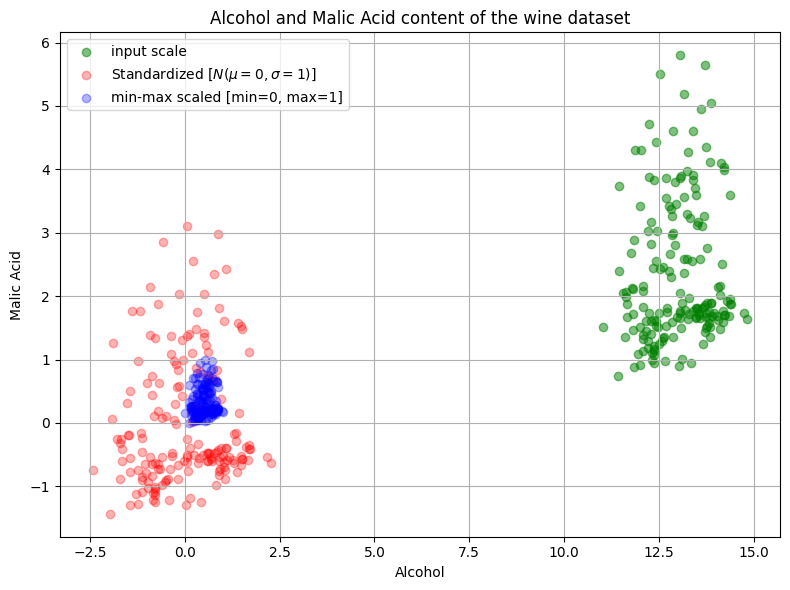

In [23]:
from matplotlib import pyplot as plt
def plot():
    plt.figure(figsize=(8,6))

    plt.scatter(df['Alcohol'], df['Malic acid'], color='green', label='input scale', alpha=0.5)

    plt.scatter(df_std[:,0], df_std[:,1], color='red', label='Standardized [$N (\mu=0,  \sigma=1)$]', alpha=0.3)

    plt.scatter(df_minmax[:,0], df_minmax[:,1], color='blue', label='min-max scaled [min=0, max=1]', alpha=0.3)

    plt.title('Alcohol and Malic Acid content of the wine dataset')
    plt.xlabel('Alcohol')
    plt.ylabel('Malic Acid')
    plt.legend(loc='upper left')
    plt.grid()
    plt.tight_layout()
plot()
plt.show()

<>:6: SyntaxWarning: invalid escape sequence '\m'
<>:6: SyntaxWarning: invalid escape sequence '\m'
C:\Users\gazim\AppData\Local\Temp\ipykernel_9928\1525367244.py:6: SyntaxWarning: invalid escape sequence '\m'
  'Standardized [$N  (\mu=0, \; \sigma=1)$]',


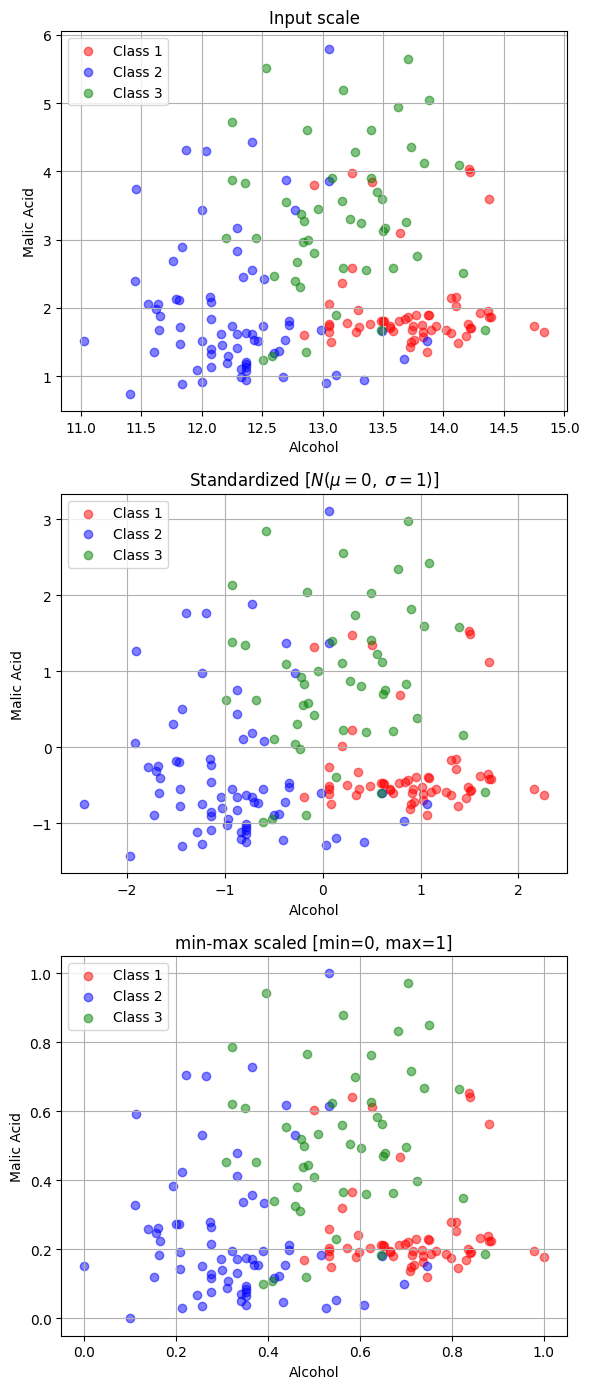

In [24]:
fig, ax = plt.subplots(3, figsize=(6,14))

for a,d,l in zip(range(len(ax)), 
               (df[['Alcohol', 'Malic acid']].values, df_std, df_minmax),
               ('Input scale', 
                'Standardized [$N  (\mu=0, \; \sigma=1)$]', 
                'min-max scaled [min=0, max=1]')
                ):
    for i,c in zip(range(1,4), ('red', 'blue', 'green')):
        ax[a].scatter(d[df['Class label'].values == i, 0], 
                  d[df['Class label'].values == i, 1],
                  alpha=0.5,
                  color=c,
                  label='Class %s' %i
                  )
    ax[a].set_title(l)
    ax[a].set_xlabel('Alcohol')
    ax[a].set_ylabel('Malic Acid')
    ax[a].legend(loc='upper left')
    ax[a].grid()
    
plt.tight_layout()

plt.show()

In [31]:
import pandas as pd
df = pd.io.parsers.read_csv('https://raw.githubusercontent.com/rasbt/pattern_classification/master/data/wine_data.csv', header=None)

In [32]:
from sklearn.model_selection import train_test_split

X_wine = df.values[:,1:]
y_wine = df.values[:,0]

X_train, X_test, y_train, y_test = train_test_split(X_wine, y_wine,test_size=0.30, random_state=12345)

from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

In [33]:
from sklearn.decomposition import PCA

# on non-standardized data
pca = PCA(n_components=2).fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)


# on standardized data
pca_std = PCA(n_components=2).fit(X_train_std)
X_train_std = pca_std.transform(X_train_std)
X_test_std = pca_std.transform(X_test_std)

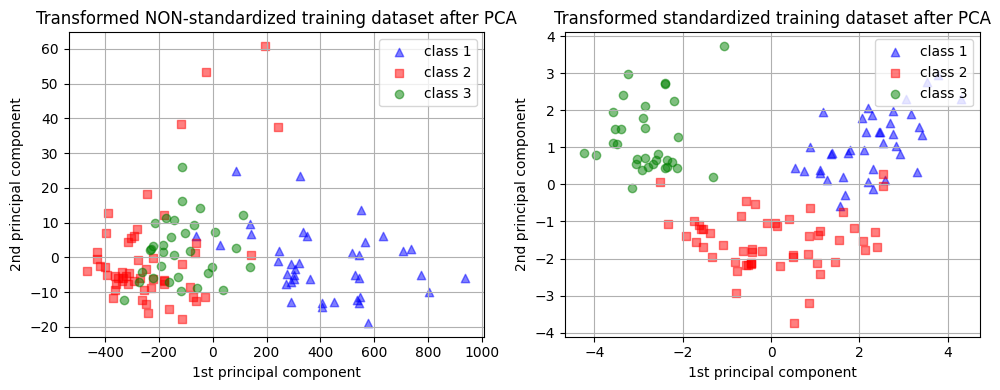

In [34]:
%matplotlib inline

from matplotlib import pyplot as plt

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,4))


for l,c,m in zip(range(1,4), ('blue', 'red', 'green'), ('^', 's', 'o')):
    ax1.scatter(X_train[y_train==l, 0], X_train[y_train==l, 1],
        color=c, 
        label='class %s' %l, 
        alpha=0.5,
        marker=m
        )

for l,c,m in zip(range(1,4), ('blue', 'red', 'green'), ('^', 's', 'o')):
    ax2.scatter(X_train_std[y_train==l, 0], X_train_std[y_train==l, 1],
        color=c, 
        label='class %s' %l, 
        alpha=0.5,
        marker=m
        )

ax1.set_title('Transformed NON-standardized training dataset after PCA')    
ax2.set_title('Transformed standardized training dataset after PCA')    
    
for ax in (ax1, ax2):

    ax.set_xlabel('1st principal component')
    ax.set_ylabel('2nd principal component')
    ax.legend(loc='upper right')
    ax.grid()
plt.tight_layout()

plt.show()

In [35]:
from sklearn.naive_bayes import GaussianNB

# on non-standardized data
gnb = GaussianNB()
fit = gnb.fit(X_train, y_train)

# on standardized data
gnb_std = GaussianNB()
fit_std = gnb_std.fit(X_train_std, y_train)

In [41]:
from sklearn import metrics

pred_train = gnb.predict(X_train)

print('\nPrediction accuracy for the training dataset')
print('{:.2%}'.format(metrics.accuracy_score(y_train, pred_train)))

pred_test = gnb.predict(X_test)

print('\nPrediction accuracy for the test dataset')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test)))


Prediction accuracy for the training dataset
81.45%

Prediction accuracy for the test dataset
64.81%



In [42]:
pred_train_std = gnb_std.predict(X_train_std)

print('\nPrediction accuracy for the training dataset')
print('{:.2%}'.format(metrics.accuracy_score(y_train, pred_train_std)))

pred_test_std = gnb_std.predict(X_test_std)

print('\nPrediction accuracy for the test dataset')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test_std)))


Prediction accuracy for the training dataset
96.77%

Prediction accuracy for the test dataset
98.15%

